Кузь Володимир МСС-3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.interpolate import CubicSpline, interp1d
import pprint

In [2]:
def f(x):
    return x**4 + x**3 + 2*x - np.cos(x)

In [65]:
a = 0
b = 1
f(a)*f(b)

-3.4596976941318602

In [66]:
n = 20
h = (b - a) / n
def arrays(a, b, n, h):
    x = np.zeros(n)
    y = np.zeros(n)
    for i in range(n):
        x[i] += h + h*i
        y[i] = f(x[i])
    return x, y
xi, yi = arrays(a, b, n, h)
print(xi)
print(yi)
        

[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.75 0.8  0.85 0.9  0.95 1.  ]
[-0.89861901 -0.79390417 -0.68488983 -0.57046658 -0.44938117 -0.32023649
 -0.18149146 -0.03146099  0.13168415  0.30991744  0.50535673  0.72026439
  0.95704745  1.21825781  1.50659238  1.82489329  2.1761481   2.56349003
  2.99019816  3.45969769]


# Поліном Лагранжа

In [67]:
def lagrange(xi, yi, n):
    x = sp.Symbol('x')
    l = 0
    for i in range(n):
        x1 = 1
        x2 = 1
        for j in range(n):
            if i != j:
                x1 *= x - xi[j]
                x2 *= xi[i] - xi[j]
        l += yi[i] * x1 / x2
    return sp.expand(l)

In [68]:
lagrange(xi, yi, n)

0.00025177001953125*x**19 + 0.01513671875*x**18 - 0.08154296875*x**17 - 0.05078125*x**16 - 0.578125*x**15 + 0.5859375*x**14 - 0.30859375*x**13 + 1.0546875*x**12 - 0.1640625*x**11 + 0.107421875*x**10 - 0.025390625*x**9 - 0.001220703125*x**8 + 0.00152587890625*x**7 + 0.0017547607421875*x**6 + 0.000308990478515625*x**5 + 0.95833945274353*x**4 + 1.0000019967556*x**3 + 0.499999970197678*x**2 + 1.99999999639113*x - 0.999999999994088

# Поліном Ньютона

In [69]:
def divided_coef(xi, yi, n):
    x = np.copy(xi)
    c = np.copy(yi)
    for i in range(1, n):
        c[i:n] = (c[i:n] - c[i - 1])/(x[i:n] - x[i - 1])
    return c

In [70]:
def newton(xi, yi, n):
    x = sp.Symbol('x')
    c = divided_coef(xi, yi, n)
    p = c[n-1]
    for i in range(1,n):
        p = c[n-1-i] + (x - xi[n-1-i])*p
    return sp.expand(p)

In [71]:
newton(xi, yi, n)

-0.000429858518949023*x**19 + 0.00434390770886289*x**18 - 0.0204243205231248*x**17 + 0.0593306274516931*x**16 - 0.119244114333927*x**15 + 0.175962190791224*x**14 - 0.197440366252131*x**13 + 0.172128814174432*x**12 - 0.118122162127501*x**11 + 0.0642510579823466*x**10 - 0.0277573807414218*x**9 + 0.00947682137515383*x**8 - 0.00255948639821822*x**7 + 0.00192497423144156*x**6 - 8.57032995195485e-5*x**5 + 0.958343505122753*x**4 + 0.999999140813751*x**3 + 0.500000048241683*x**2 + 1.99999999841053*x - 0.999999999977223

# Кубічний сплайн

In [72]:
def matrixA(xi, n):
    A = np.zeros((n-2, n-2))
    for i in range(n-2):
        for j in range(n-2):
            if i == j:
                A[i][j] = (xi[i]+xi[i+1])/3
                if i < n-3:
                    A[i+1][j] = xi[i+1]/6
                if i > 0:
                    A[i-1][j] = xi[i-1]/6
    return A
A = matrixA(xi, n)                

In [73]:
def matrixH(xi, n):
    H = np.zeros((n-2, n))
    for i in range(n-2):
        for j in range(n):
            if i == j:
                H[i][j] = 1/xi[i]
                H[i][j+1] = -1/xi[i] - 1/xi[j+1]
                H[i][j+2] = 1/xi[j+2]
    return H
H = matrixH(xi, n)     

In [74]:
C = np.dot(np.linalg.inv(A),np.dot(H,yi))

In [75]:
def cubspline(xi, yi, n):
    x = sp.Symbol('x')
    a = 0
    b = 0
    d = 0
    S = 0
    for i in range(1, n-2):
        a = yi[i]
        d = (C[i]-C[i-1])/xi[i]
        b = ((xi[i] / 2) * C[i]) - ((xi[i]*xi[i]*d)/ 6) + ((yi[i] - yi[i-1]) / xi[i])
        S += a + b*(x - xi[i]) + (C[i]/2)*(x-xi[i])**2 + (d/6)*(x-xi[i])**3
    return S

In [76]:
cubspline(xi, yi, n)

7.85073185235388*x - 0.00979411265199442*(x - 0.9)**3 - 0.110825668255793*(x - 0.9)**2 + 0.00372008009806456*(x - 0.85)**3 - 0.084381564095408*(x - 0.85)**2 + 0.00020749841939969*(x - 0.8)**3 - 0.0938677683454726*(x - 0.8)**2 + 0.00137584466037289*(x - 0.75)**3 - 0.0943657645520319*(x - 0.75)**2 + 0.00123954703176189*(x - 0.7)**3 - 0.0974614150378709*(x - 0.7)**2 + 0.00138524368662747*(x - 0.65)**3 - 0.100064463804571*(x - 0.65)**2 + 0.00124091631701289*(x - 0.6)**3 - 0.102765688993494*(x - 0.6)**2 + 0.000698824243871652*(x - 0.55)**3 - 0.104999338364118*(x - 0.55)**2 - 0.000921130786123214*(x - 0.5)**3 - 0.106152398366506*(x - 0.5)**2 - 0.00451754344657719*(x - 0.45)**3 - 0.104770702187321*(x - 0.45)**2 - 0.0148776425617472*(x - 0.4)**3 - 0.0986720185344418*(x - 0.4)**2 - 0.0324527883554657*(x - 0.35)**3 - 0.0808188474603452*(x - 0.35)**2 - 0.115809326125754*(x - 0.3)**3 - 0.0467434196871062*(x - 0.3)**2 - 0.165699895316183*(x - 0.25)**3 + 0.0574849738260724*(x - 0.25)**2 - 1.35412664

# Графік

In [77]:
Lagrange = []
Newton = []
CubSpline = []
for i in range(n):
    Lagrange.append(lagrange(xi,yi,n).subs('x', xi[i]))
    Newton.append(newton(xi,yi,n).subs('x', xi[i]))
    CubSpline.append(cubspline(xi,yi,n).subs('x', xi[i]))

In [78]:
CS = CubicSpline(xi, yi, bc_type='natural')

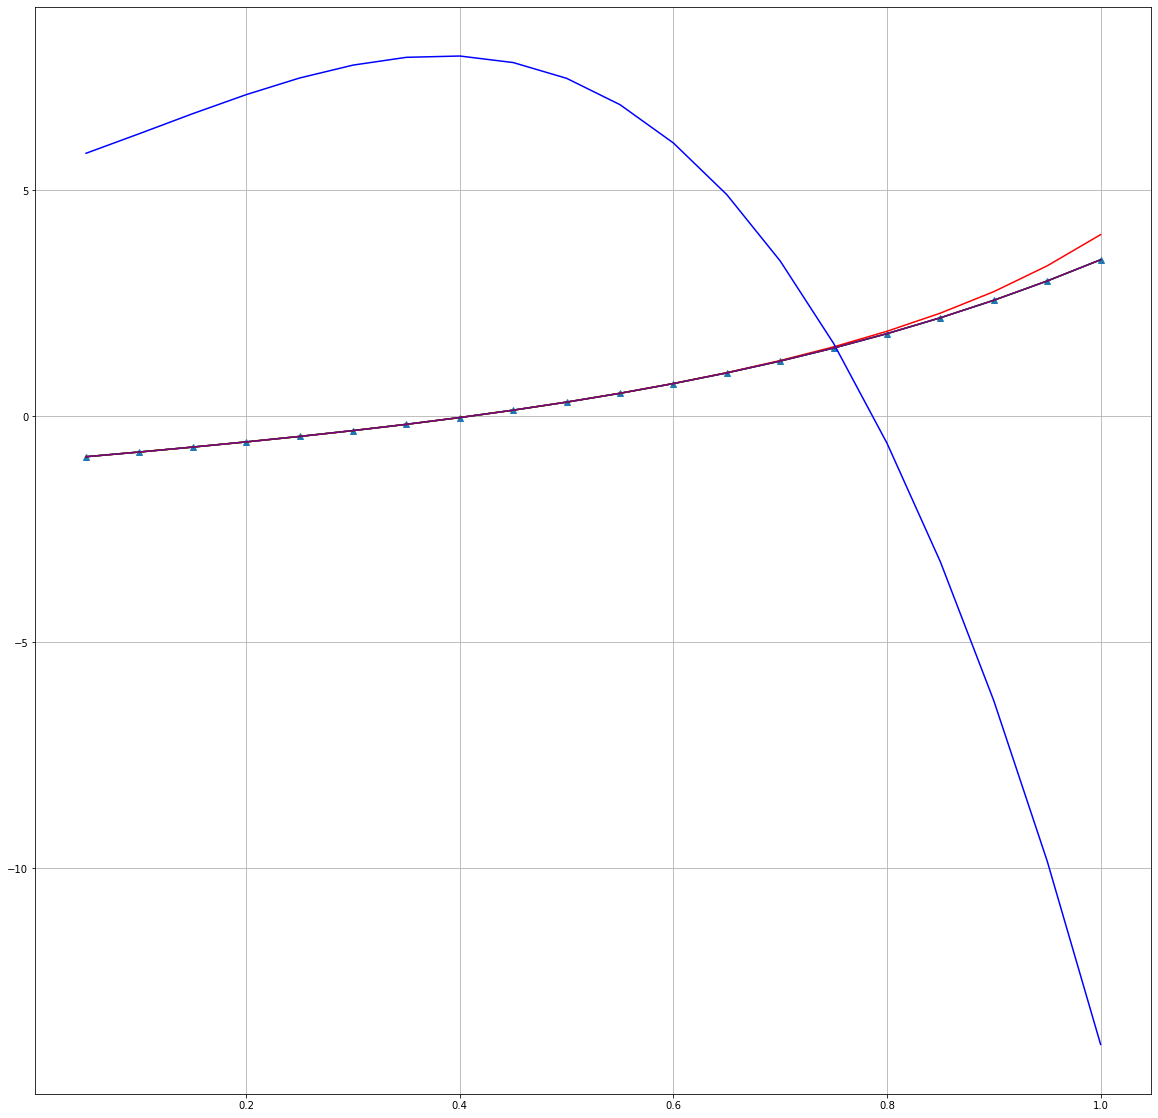

In [79]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.grid()
ax.plot(xi, yi, '^')
ax.plot(xi, f(xi), label = 'f', color = 'black')
ax.plot(xi, Lagrange, color = 'red')
ax.plot(xi, CubSpline, color = 'blue')
ax.plot(xi, Newton, color = 'green')
ax.plot(xi, CS(xi), color = 'purple')
plt.show()